In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='cb6dcd9e-8efe-4648-a654-594452363763', project_access_token='p-b6f965fe4b6fd07b603ef571a075e84229d07119')
pc = project.project_context


In [2]:
# Insert project token here

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [3]:
!pip install scikit-learn --upgrade

     |████████████████████████████████| 6.8MB 5.2MB/s eta 0:00:01
     |████████████████████████████████| 307kB 17.9MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [4]:
!pip install wget

  Stored in directory: /home/dsxuser/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [5]:
!pip install xgboost --upgrade

     |████████████████████████████████| 148.9MB 83kB/s s eta 0:00:01    |██████████                      | 46.7MB 21.5MB/s eta 0:00:05��        | 108.2MB 23.0MB/s eta 0:00:02███████████████████████▉      | 120.3MB 23.0MB/s eta 0:00:02     |███████████████████████████████ | 144.6MB 26.6MB/s eta 0:00:01


In [6]:
!pip install imblearn --upgrade

     |████████████████████████████████| 174kB 7.2MB/s eta 0:00:01


<hr>

## Descargar los conjuntos de datos en formato .csv

In [7]:
import pandas as pd

In [9]:

!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-13 00:36:26--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘training_dataset.csv’

    [ <=>                                   ] 2,327,419   --.-K/s   in 0.04s   

2020-09-13 00:36:26 (61.5 MB/s) - ‘training_dataset.csv’ saved [2327419]



ID Genero  Años Estado_civil           Trabajo               Sector  \
23994  160      F  40.0      Soltero          Profesor       Sector privado   
23995  155      F  24.0          NaN          Profesor  Institucion publica   
23996  229      F  24.0       Casado          Profesor         Desempleados   
23997  214      F  24.0      Soltero      Desempleados         Desempleados   
23998   30      M  30.0       Casado  Servidor publico  Institucion publica   

        Telefono  Anos_usando_internet_banking  Anos_usando_banca_movil  \
23994  Iphone 6+                          10.0                      3.0   
23995        L G                          15.0                      6.0   
23996     LG V10                           5.0                      3.0   
23997    Android                           5.0                      6.0   
23998          0                           5.0                      4.0   

      Banca_movil_userfriendly  Frecuencia_internet_banking_mes  \
23994                       Si                             31.0   
23995                       Si                             30.0   
23996                       Si                              0.0   
23997                       No                              7.0   
23998                       No                             31.0   

       Frecuencia_banca_movil_mes  Frecuencia_pagamentos_tarjeta_mes  \
23994                         0.0                                0.0   
23995                        30.0                               31.0   
23996                        30.0                                1.0   
23997                         0.0                                1.0   
23998                        31.0                                0.0   

       Frecuencia_tarjeta_virtual_mes  Frecuencia_saldo_cuenta_mes    TARGET  
23994                             0.0                         31.0  Perfil_3  
23995                            30.0                          7.0  Perfil_0  
23996                             0.0                          0.0  Perfil_4  
23997                             1.0                          0.0  Perfil_4  
23998                             0.0                          0.0  Perfil_3

Sobre el archivo "training_dataset.csv", temos alguna información sobre los usuarios de la app de BanCoppel:

**ID**

**Genero**

**Idade**

**Estado_civil**

**Trabajo**

**Sector**

**Telefono**

**Anos_usando_internet_banking**

**Anos_usando_banca_movil**

**Banca_movil_userfriendly**

**Frecuencia_internet_banking_mes**

**Frecuencia_banca_movil_mes**

**Frecuencia_pagamentos_tarjeta_mes**

**Frecuencia_tarjeta_virtual_mes**

**Frecuencia_saldo_cuenta_mes**

**TARGET**

In [10]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
ID                                   23999 non-null int64
Genero                               23110 non-null object
Años                                 23731 non-null float64
Estado_civil                         23295 non-null object
Trabajo                              21044 non-null object
Sector                               23640 non-null object
Telefono                             22578 non-null object
Anos_usando_internet_banking         23355 non-null float64
Anos_usando_banca_movil              22698 non-null float64
Banca_movil_userfriendly             23999 non-null object
Frecuencia_internet_banking_mes      21275 non-null float64
Frecuencia_banca_movil_mes           22728 non-null float64
Frecuencia_pagamentos_tarjeta_mes    23714 non-null float64
Frecuencia_tarjeta_virtual_mes       23524 non-null float64
Frecuencia_saldo_cuenta_mes          23429 non-null float64

In [11]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
ID                                   23999 non-null int64
Genero                               23110 non-null object
Años                                 23731 non-null float64
Estado_civil                         23295 non-null object
Trabajo                              21044 non-null object
Sector                               23640 non-null object
Telefono                             22578 non-null object
Anos_usando_internet_banking         23355 non-null float64
Anos_usando_banca_movil              22698 non-null float64
Banca_movil_userfriendly             23999 non-null object
Frecuencia_internet_banking_mes      21275 non-null float64
Frecuencia_banca_movil_mes           22728 non-null float64
Frecuencia_pagamentos_tarjeta_mes    23714 non-null float64
Frecuencia_tarjeta_virtual_mes       23524 non-null float64
Frecuencia_saldo_cuenta_mes          23429 non-null float64

In [12]:
df_training_dataset.nunique()

ID                                   250
Genero                                 3
Años                                   6
Estado_civil                           2
Trabajo                               31
Sector                                 4
Telefono                              73
Anos_usando_internet_banking           5
Anos_usando_banca_movil                6
Banca_movil_userfriendly               2
Frecuencia_internet_banking_mes        7
Frecuencia_banca_movil_mes             7
Frecuencia_pagamentos_tarjeta_mes      7
Frecuencia_tarjeta_virtual_mes         7
Frecuencia_saldo_cuenta_mes            8
TARGET                                 6
dtype: int64

In [13]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(df_training_dataset, title="Pandas Profiling Report")
#profile

ModuleNotFoundError: No module named 'pandas_profiling'

<hr>

## Desglose del desafío: clasificación multiclase

Este es un desafio cuyo objetivo de negocio es la segmentación de usuario de aplicativos de BanCopp. Podemos utilizar  dos enfoques: Machine Learning supervisado (clasificación) o no supervisado (clustering). En este desafío será usado la clasificación porque el conjunto de datos ya está disponible con "labels", o en otras palabras, ya con la variable objetivo. 

En la biblioteca scikit-learn tenemos diversos algoritmos para clasificación. El participante es libre para utilizar el framework que desee para completar este desafío.

En este notebook será mostrado un ejemplo usando el algoritmo "Decision Tree" para clasificar los estudantes en seis diferentes perfiles.

# ¡Atención!

La columna objetivo de este desafío es la columna ``TARGET``

<hr>

In [14]:
df_training_dataset.columns

Index(['ID', 'Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono',
       'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Banca_movil_userfriendly', 'Frecuencia_internet_banking_mes',
       'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes',
       'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes',
       'TARGET'],
      dtype='object')

In [15]:
df_training_dataset.head()

ID Genero  Años Estado_civil                   Trabajo  \
0  159      M  30.0       Casado                  Profesor   
1   86      F  35.0       Casado                  Profesor   
2   83      M  24.0      Soltero          Servidor publico   
3  214      M  35.0       Casado  Ingeniero de informacion   
4   31      M  24.0      Soltero                 Ingeniero   

                Sector      Telefono  Anos_usando_internet_banking  \
0  Institucion publica       Samsung                           0.0   
1  Institucion publica       Samsung                           5.0   
2  Institucion publica  LeNovo A7000                           0.0   
3  Institucion publica       Samsung                           5.0   
4  Institucion publica   Samsung  A6                           6.0   

   Anos_usando_banca_movil Banca_movil_userfriendly  \
0                      6.0                       Si   
1                      3.0                       No   
2                      3.0                       Si   
3                      3.0                       No   
4                      0.0                       No   

   Frecuencia_internet_banking_mes  Frecuencia_banca_movil_mes  \
0                             50.0                         0.0   
1                             31.0                         4.0   
2                             50.0                        31.0   
3                             30.0                         7.0   
4                              4.0                         NaN   

   Frecuencia_pagamentos_tarjeta_mes  Frecuencia_tarjeta_virtual_mes  \
0                                1.0                             0.0   
1                               31.0                             0.0   
2                               15.0                             1.0   
3                               30.0                             0.0   
4                                1.0                            15.0   

   Frecuencia_saldo_cuenta_mes    TARGET  
0                         30.0  Perfil_2  
1                         30.0  Perfil_1  
2                         15.0  Perfil_4  
3                         31.0  Perfil_1  
4                          1.0  Perfil_3

In [16]:
df_training_dataset=df_training_dataset.drop(columns=['ID'], inplace=False)

In [17]:
df_training_dataset.columns

Index(['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono',
       'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Banca_movil_userfriendly', 'Frecuencia_internet_banking_mes',
       'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes',
       'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes',
       'TARGET'],
      dtype='object')

In [18]:
df_training_dataset.Genero.value_counts()

M    12988
F    10030
0       92
Name: Genero, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.countplot(ax=axes[0], x='Genero', data=df_training_dataset)
plt.show()

<Figure size 1000x800 with 2 Axes>

In [20]:
#reemplazar valores en genero
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['Genero'])

df_training_dataset.Genero.value_counts()

M    12988
F    10030
0       92
Name: Genero, dtype: int64

In [21]:

df_training_dataset['Genero']=df_training_dataset['Genero'].replace('0', 'None')

values = {'Genero': 'None','Estado_civil': 'None','Trabajo': 'None','Sector': 'None','Telefono': 'None'}
df_training_dataset=df_training_dataset.fillna(value=values)


In [22]:

df_training_dataset.isna().sum()

Genero                                  0
Años                                  256
Estado_civil                            0
Trabajo                                 0
Sector                                  0
Telefono                                0
Anos_usando_internet_banking          616
Anos_usando_banca_movil              1264
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2626
Frecuencia_banca_movil_mes           1228
Frecuencia_pagamentos_tarjeta_mes     272
Frecuencia_tarjeta_virtual_mes        457
Frecuencia_saldo_cuenta_mes           552
TARGET                                  0
dtype: int64

In [23]:
df_training_dataset['Años'] = df_training_dataset['Años'].fillna(int(df_training_dataset['Años'].mean()))
df_training_dataset['Anos_usando_internet_banking'] = df_training_dataset['Anos_usando_internet_banking'].fillna(int(df_training_dataset['Anos_usando_internet_banking'].mean()))
df_training_dataset['Anos_usando_banca_movil'] = df_training_dataset['Anos_usando_banca_movil'].fillna(int(df_training_dataset['Anos_usando_banca_movil'].mean()))
df_training_dataset['Frecuencia_tarjeta_virtual_mes'] = df_training_dataset['Frecuencia_tarjeta_virtual_mes'].fillna(int(df_training_dataset['Frecuencia_tarjeta_virtual_mes'].mean()))
 
    
df_training_dataset['Frecuencia_internet_banking_mes'] = df_training_dataset['Frecuencia_internet_banking_mes'].fillna(int(df_training_dataset['Frecuencia_internet_banking_mes'].median()))
df_training_dataset['Frecuencia_banca_movil_mes'] = df_training_dataset['Frecuencia_banca_movil_mes'].fillna(int(df_training_dataset['Frecuencia_banca_movil_mes'].median()))
df_training_dataset['Frecuencia_pagamentos_tarjeta_mes'] = df_training_dataset['Frecuencia_pagamentos_tarjeta_mes'].fillna(int(df_training_dataset['Frecuencia_pagamentos_tarjeta_mes'].median()))
df_training_dataset['Frecuencia_saldo_cuenta_mes'] = df_training_dataset['Frecuencia_saldo_cuenta_mes'].fillna(int(df_training_dataset['Frecuencia_saldo_cuenta_mes'].median()))

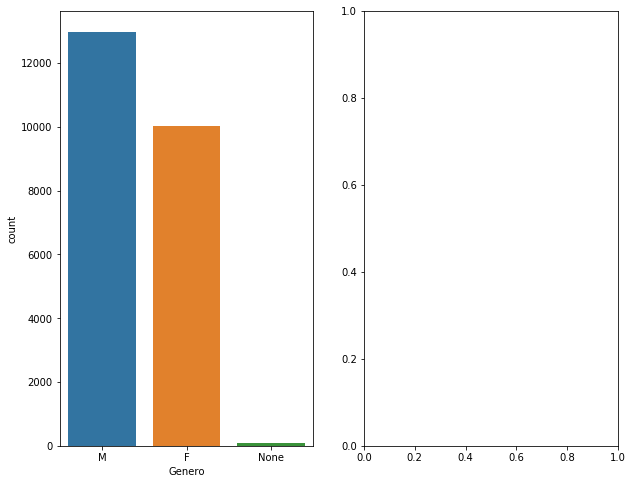

In [24]:
 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.countplot(ax=axes[0], x='Genero', data=df_training_dataset)
plt.show()

## Pre-procesando el dataset antes del entrenamiento

### Removiendo todas las lineas que poseen algun valor nulo en determinadas columnas

Usando el método Pandas **DataFrame.dropna()** usted puede remover todas las lineas nulas del dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [25]:
# Mostrando los datos nulos del dataset antes de la primera transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación DropNA: 

Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
TARGET                               0
dtype: int64



In [24]:
# Aplicando la función para borrar todas las lines con valore NaN en las siguientes columnas:
#df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes', 'TARGET'])

In [25]:
# # Mostrando los datos nulos del dataset despues de la primera transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset despues de la transformación DropNA: 

Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
TARGET                               0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los valores NaN, usaremos a substituición por la constante 0 como **ejemplo**.

Usted puede escoger la estrategía que crea mejor para tratar los valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [26]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='mean'
)

### Eliminando colunas no desadas

Vamos  **demonstrar** abajo como usar el método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

# ¡Atención!

Las columnas removidas anteriores son solo por ejemplo, puede usar las columnas que desee e incluso crear nuevas columnas con datos que crea que son importantes.

### Tratamiento de variables categóricas

Como mencionado antes, los computadores no son buenos con variables "categóricas" (strings).

Dado una columna con variable categórica, lo que podemos realizar es la codificación de esa columna en multiples columnas contiendo variables binárias. Este proceso es llamado "one-hot-encoding" o "dummy encoding". Si usted no esta familiarizado con estos terminos, usted puede buscar mas sobre estos en internet :)

In [30]:
# Tratando variables categóricas con el método Pandas ``get_dummies()''
#df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Banca_movil_userfriendly'])
#df_training.tail()

df=df_training_dataset

In [385]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(df_training_dataset, title="Pandas Profiling Report")
#profile

In [31]:
import numpy as np 
top10_gen=[x for x in df.Genero.value_counts().sort_values(ascending=False).head(10).index]
top10_gen

i=0
top10_l_gen=[]
for label in top10_gen:
    i=i+1
    nlabel='gen_'+str(i)
    top10_l_gen.append(nlabel)
    df[nlabel]=np.where(df.Genero==label,1,0) 

df = df.drop(columns=['Genero'], inplace=False)
top10_l_gen

['gen_1', 'gen_2', 'gen_3']

In [32]:
top10_est=[x for x in df.Estado_civil.value_counts().sort_values(ascending=False).head(10).index]
top10_est

i=0
top10_l_est=[]
for label in top10_est:
    i=i+1
    nlabel='est_'+str(i)
    top10_l_est.append(nlabel)
    df[nlabel]=np.where(df.Estado_civil==label,1,0)

df = df.drop(columns=['Estado_civil'], inplace=False)

top10_l_est

['est_1', 'est_2', 'est_3']

In [33]:
top10_trab=[x for x in df.Trabajo.value_counts().sort_values(ascending=False).head(10).index]
top10_trab

i=0
top10_l_trab=[]
for label in top10_trab:
    i=i+1
    nlabel='trab_'+str(i)
    top10_l_trab.append(nlabel)
    df[nlabel]=np.where(df.Trabajo==label,1,0)


df = df.drop(columns=['Trabajo'], inplace=False)
top10_l_trab

['trab_1',
 'trab_2',
 'trab_3',
 'trab_4',
 'trab_5',
 'trab_6',
 'trab_7',
 'trab_8',
 'trab_9',
 'trab_10']

In [34]:
top10_sec=[x for x in df.Sector.value_counts().sort_values(ascending=False).head(10).index]
top10_sec

i=0
top10_l_sec=[]
for label in top10_sec:
    i=i+1
    nlabel='sect_'+str(i)
    top10_l_sec.append(nlabel)
    df[nlabel]=np.where(df.Sector==label,1,0)

df = df.drop(columns=['Sector'], inplace=False)
top10_l_sec

['sect_1', 'sect_2', 'sect_3', 'sect_4', 'sect_5']

In [35]:
top10_tel=[x for x in df.Telefono.value_counts().sort_values(ascending=False).head(10).index]
top10_tel

i=0
top10_l_tel=[]
for label in top10_tel:
    i=i+1
    nlabel='tel_'+str(i)
    top10_l_tel.append(nlabel)
    df[nlabel]=np.where(df.Telefono==label,1,0)


df = df.drop(columns=['Telefono'], inplace=False)
top10_l_tel

['tel_1',
 'tel_2',
 'tel_3',
 'tel_4',
 'tel_5',
 'tel_6',
 'tel_7',
 'tel_8',
 'tel_9',
 'tel_10']

In [36]:
top10_userf=[x for x in df.Banca_movil_userfriendly.value_counts().sort_values(ascending=False).head(10).index]
top10_userf

i=0
top10_l_userf=[]
for label in top10_userf:
    i=i+1
    nlabel='userf_'+str(i)
    top10_l_userf.append(nlabel)
    df[nlabel]=np.where(df.Banca_movil_userfriendly==label,1,0)


df = df.drop(columns=['Banca_movil_userfriendly'], inplace=False)
top10_l_userf

['userf_1', 'userf_2']

# ¡Atención!

La columna **TARGET** debe ser mantenida como una string. Usted no necesita procesar/codificar la variable objetivo.

<hr>

## Entrenando un clasificador con base en un árbol de decisión

### Selecionando FEATURES y definiendo la variable TARGET

In [37]:
df_training=df
df_training.columns

Index(['Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'TARGET', 'gen_1', 'gen_2', 'gen_3',
       'est_1', 'est_2', 'est_3', 'trab_1', 'trab_2', 'trab_3', 'trab_4',
       'trab_5', 'trab_6', 'trab_7', 'trab_8', 'trab_9', 'trab_10', 'sect_1',
       'sect_2', 'sect_3', 'sect_4', 'sect_5', 'tel_1', 'tel_2', 'tel_3',
       'tel_4', 'tel_5', 'tel_6', 'tel_7', 'tel_8', 'tel_9', 'tel_10',
       'userf_1', 'userf_2'],
      dtype='object')

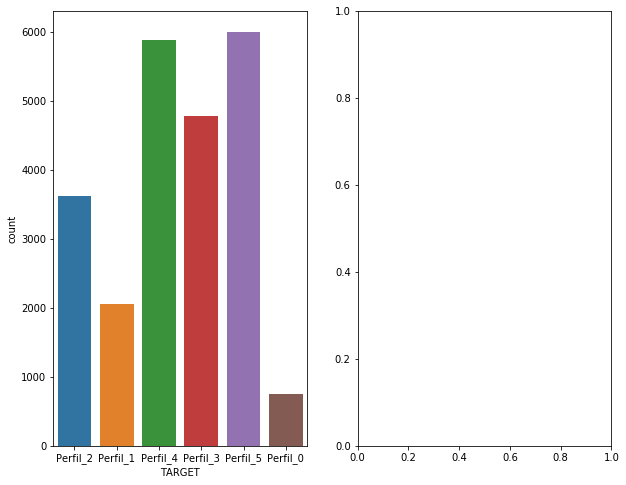

In [38]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.countplot(ax=axes[0], x='TARGET', data=df_training)
plt.show()

In [460]:
count_class_0, count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = df_training['TARGET'].value_counts()


print(count_class_0);
print(count_class_1);
print(count_class_2);
print(count_class_3);
print(count_class_4);
print(count_class_5);


6007
5892
4787
3620
2058
746


In [461]:
df_class_0 = df_training[df_training['TARGET'] == 'Perfil_0']
df_class_1 = df_training[df_training['TARGET'] == 'Perfil_1']
df_class_2 = df_training[df_training['TARGET'] == 'Perfil_2']
df_class_3 = df_training[df_training['TARGET'] == 'Perfil_3']
df_class_4 = df_training[df_training['TARGET'] == 'Perfil_4']
df_class_5 = df_training[df_training['TARGET'] == 'Perfil_5']


df_class_0_under = df_class_0.sample(count_class_5)
df_class_1_under = df_class_1.sample(count_class_5)
df_class_2_under = df_class_2.sample(count_class_5)
df_class_3_under = df_class_3.sample(count_class_3)
df_class_4_under = df_class_4.sample(count_class_3)
df_class_5_under = df_class_5.sample(count_class_1)

df_test_under = pd.concat([df_class_0, df_class_1,df_class_2,df_class_3,df_class_4,df_class_5_under], axis=0)

print('Random under-sampling:')
print(df_test_under['TARGET'].value_counts())

Random under-sampling:
Perfil_5    5892
Perfil_4    5892
Perfil_3    4787
Perfil_2    3620
Perfil_1    2058
Perfil_0     746
Name: TARGET, dtype: int64


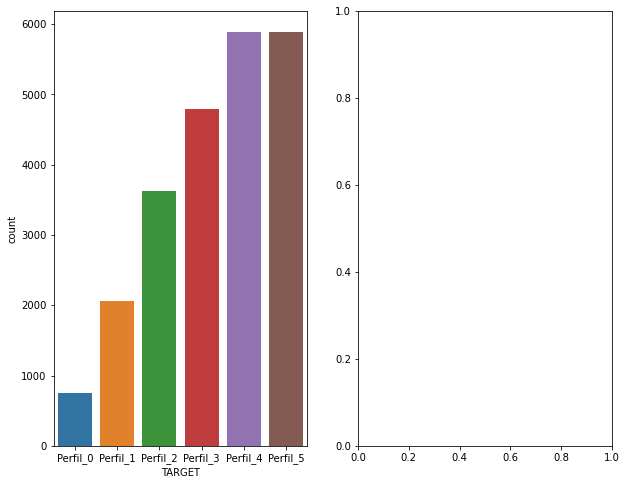

In [462]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.countplot(ax=axes[0], x='TARGET', data=df_test_under)
plt.show()

In [72]:
df_training.columns

Index(['Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'TARGET', 'gen_1', 'gen_2', 'gen_3',
       'est_1', 'est_2', 'est_3', 'trab_1', 'trab_2', 'trab_3', 'trab_4',
       'trab_5', 'trab_6', 'trab_7', 'trab_8', 'trab_9', 'trab_10', 'sect_1',
       'sect_2', 'sect_3', 'sect_4', 'sect_5', 'tel_1', 'tel_2', 'tel_3',
       'tel_4', 'tel_5', 'tel_6', 'tel_7', 'tel_8', 'tel_9', 'tel_10',
       'userf_1', 'userf_2'],
      dtype='object')

In [52]:
features = df_training[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes'
    ]
    +top10_l_gen
    +top10_l_est
    +top10_l_trab
    +top10_l_sec
    +top10_l_tel
    +top10_l_userf
]
target = df_training['TARGET']  ## No cambie esta variable

### Dividiendo el conjunto de datos en conjuntos de entrenamiento y pruebas

In [57]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.01, random_state=133)
print(f" x train {len(X_train)} , x test {len(X_test)}")

 x train 22878 , x test 232


In [58]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)
# transform the dataset
oversample = SMOTE()
#X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({'Perfil_5': 5945, 'Perfil_4': 5824, 'Perfil_3': 4747, 'Perfil_2': 3582, 'Perfil_1': 2042, 'Perfil_0': 738})
Counter({'Perfil_5': 5945, 'Perfil_4': 5824, 'Perfil_3': 4747, 'Perfil_2': 3582, 'Perfil_1': 2042, 'Perfil_0': 738})


### Entrenando un árbol de decisión

In [59]:

# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)


### Haciendo predicciones en la muestra de prueba

In [60]:
predictions = dtc.predict(X_test)

y_pred = predictions

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
print("Exactitud tree : {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))


              precision    recall  f1-score   support

    Perfil_0       0.57      0.50      0.53         8
    Perfil_1       0.67      0.62      0.65        16
    Perfil_2       0.69      0.66      0.68        38
    Perfil_3       0.61      0.78      0.68        40
    Perfil_4       0.70      0.78      0.74        68
    Perfil_5       0.47      0.35      0.40        62

    accuracy                           0.62       232
   macro avg       0.62      0.62      0.61       232
weighted avg       0.61      0.62      0.61       232

Exactitud tree : 62.5%


In [44]:
y_pred

array(['Perfil_4', 'Perfil_4', 'Perfil_5', ..., 'Perfil_2', 'Perfil_3',
       'Perfil_5'], dtype=object)

### Analizando la calidad del modelo a través de la matriz de confusión

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

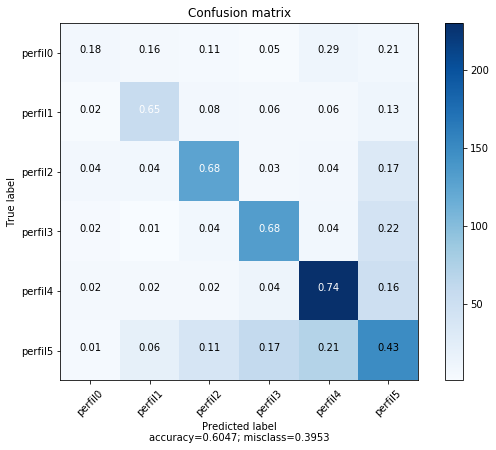

In [46]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

              precision    recall  f1-score   support

    Perfil_0       0.86      0.75      0.80         8
    Perfil_1       0.79      0.69      0.73        16
    Perfil_2       0.78      0.76      0.77        38
    Perfil_3       0.69      0.78      0.73        40
    Perfil_4       0.75      0.85      0.80        68
    Perfil_5       0.60      0.50      0.54        62

    accuracy                           0.72       232
   macro avg       0.74      0.72      0.73       232
weighted avg       0.71      0.72      0.71       232

Exactitud GradientBoostingClassifier tunning: 71.5517%


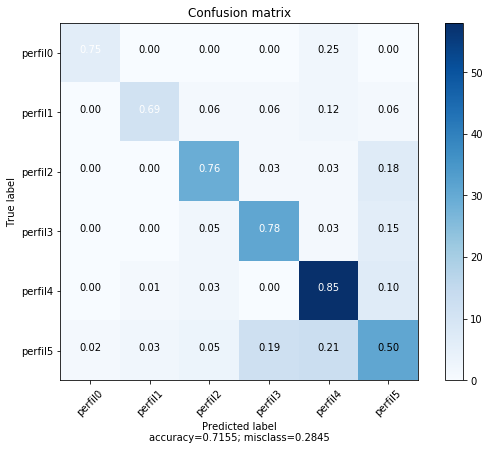

In [61]:


x_train=X_train
x_test=X_test
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier
dtc=GradientBoostingClassifier(max_depth=7)
dtc.fit(x_train, y_train)
predictions = dtc.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

print("Exactitud GradientBoostingClassifier tunning: {}%".format(100*round(accuracy_score(y_test, predictions), 6)))

from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

              precision    recall  f1-score   support

    Perfil_0       0.80      0.50      0.62         8
    Perfil_1       0.69      0.69      0.69        16
    Perfil_2       0.84      0.82      0.83        38
    Perfil_3       0.72      0.82      0.77        40
    Perfil_4       0.78      0.85      0.82        68
    Perfil_5       0.67      0.58      0.62        62

    accuracy                           0.75       232
   macro avg       0.75      0.71      0.72       232
weighted avg       0.74      0.75      0.74       232

Exactitud OneVsRestClassifier GradientBoostingClassifier: 74.569%


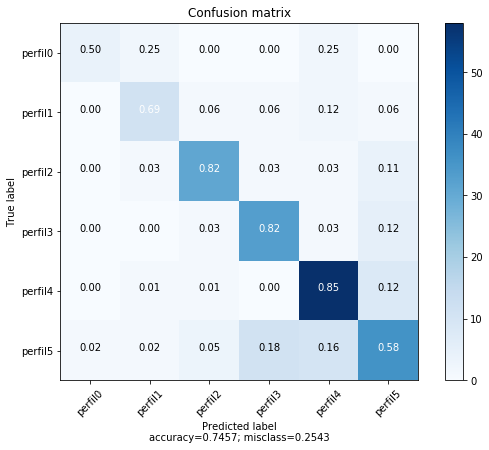

In [62]:

x_train=X_train
x_test=X_test 



from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(GradientBoostingClassifier(max_depth=7))
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

y_pred = predictions
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Exactitud OneVsRestClassifier GradientBoostingClassifier: {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))

plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

<hr>

## Scoring de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos los resultados clasificados del seguiente dataset llamado "to_be_scored.csv":

### Download la "Hoja de evaluación"

In [78]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-13 01:41:08--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.1’

    [ <=>                                   ] 87,631      --.-K/s   in 0.01s   

2020-09-13 01:41:08 (8.07 MB/s) - ‘to_be_scored.csv.1’ saved [87631]



ID Genero  Años Estado_civil           Trabajo               Sector  \
995   25      M  35.0       Casado      Desempleados       Sector privado   
996  179      M  40.0      Soltero          Profesor       Sector privado   
997  222      M  30.0       Casado          Profesor  Institucion publica   
998  238      F  35.0       Casado  Servidor publico         Desempleados   
999  152      M  35.0      Soltero          Profesor  Institucion publica   

     Telefono  Anos_usando_internet_banking  Anos_usando_banca_movil  \
995      ASUS                           5.0                      3.0   
996   Iphone                           10.0                      NaN   
997     LG G2                           5.0                      3.0   
998  Iphone 5                          15.0                      4.0   
999    Iphone                           0.0                      NaN   

    Banca_movil_userfriendly  Frecuencia_internet_banking_mes  \
995                       No                              7.0   
996                       Si                              0.0   
997                       Si                             31.0   
998                       No                              0.0   
999                       Si                             30.0   

     Frecuencia_banca_movil_mes  Frecuencia_pagamentos_tarjeta_mes  \
995                        50.0                                1.0   
996                         1.0                                0.0   
997                        31.0                                0.0   
998                         4.0                                1.0   
999                         7.0                               15.0   

     Frecuencia_tarjeta_virtual_mes  Frecuencia_saldo_cuenta_mes  
995                             0.0                         31.0  
996                            15.0                          1.0  
997                             0.0                          NaN  
998                             0.0                         31.0  
999                            15.0                         15.0

# ¡Atención!

El dataframe ``to_be_scored`` en su "hoja de evaluación". Note que la columna "categoria" no existe en esta muetra, por lo que no puede ser utilizada para entrenar modelos supervisados

In [79]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
ID                                   1000 non-null int64
Genero                               963 non-null object
Años                                 980 non-null float64
Estado_civil                         976 non-null object
Trabajo                              864 non-null object
Sector                               983 non-null object
Telefono                             927 non-null object
Anos_usando_internet_banking         977 non-null float64
Anos_usando_banca_movil              945 non-null float64
Banca_movil_userfriendly             1000 non-null object
Frecuencia_internet_banking_mes      911 non-null float64
Frecuencia_banca_movil_mes           940 non-null float64
Frecuencia_pagamentos_tarjeta_mes    991 non-null float64
Frecuencia_tarjeta_virtual_mes       977 non-null float64
Frecuencia_saldo_cuenta_mes          973 non-null float64
dtypes: float64(8), int64(1), 

In [80]:
df_to_be_scored.isna().sum()

ID                                     0
Genero                                37
Años                                  20
Estado_civil                          24
Trabajo                              136
Sector                                17
Telefono                              73
Anos_usando_internet_banking          23
Anos_usando_banca_movil               55
Banca_movil_userfriendly               0
Frecuencia_internet_banking_mes       89
Frecuencia_banca_movil_mes            60
Frecuencia_pagamentos_tarjeta_mes      9
Frecuencia_tarjeta_virtual_mes        23
Frecuencia_saldo_cuenta_mes           27
dtype: int64

In [81]:

df_to_be_scored['Genero']=df_to_be_scored['Genero'].replace('0', 'None')

values = {'Genero': 'None','Estado_civil': 'None','Trabajo': 'None','Sector': 'None','Telefono': 'None'}
df_to_be_scored=df_to_be_scored.fillna(value=values)


In [82]:
df_to_be_scored.isna().sum()

ID                                    0
Genero                                0
Años                                 20
Estado_civil                          0
Trabajo                               0
Sector                                0
Telefono                              0
Anos_usando_internet_banking         23
Anos_usando_banca_movil              55
Banca_movil_userfriendly              0
Frecuencia_internet_banking_mes      89
Frecuencia_banca_movil_mes           60
Frecuencia_pagamentos_tarjeta_mes     9
Frecuencia_tarjeta_virtual_mes       23
Frecuencia_saldo_cuenta_mes          27
dtype: int64

In [83]:
df_to_be_scored['Años'] = df_to_be_scored['Años'].fillna(int(df_to_be_scored['Años'].mean()))
df_to_be_scored['Anos_usando_internet_banking'] = df_to_be_scored['Anos_usando_internet_banking'].fillna(int(df_to_be_scored['Anos_usando_internet_banking'].mean()))
df_to_be_scored['Anos_usando_banca_movil'] = df_to_be_scored['Anos_usando_banca_movil'].fillna(int(df_to_be_scored['Anos_usando_banca_movil'].mean()))
df_to_be_scored['Frecuencia_tarjeta_virtual_mes'] = df_to_be_scored['Frecuencia_tarjeta_virtual_mes'].fillna(int(df_to_be_scored['Frecuencia_tarjeta_virtual_mes'].mean()))
 
    
df_to_be_scored['Frecuencia_internet_banking_mes'] = df_to_be_scored['Frecuencia_internet_banking_mes'].fillna(int(df_to_be_scored['Frecuencia_internet_banking_mes'].median()))
df_to_be_scored['Frecuencia_banca_movil_mes'] = df_to_be_scored['Frecuencia_banca_movil_mes'].fillna(int(df_to_be_scored['Frecuencia_banca_movil_mes'].median()))
df_to_be_scored['Frecuencia_pagamentos_tarjeta_mes'] = df_to_be_scored['Frecuencia_pagamentos_tarjeta_mes'].fillna(int(df_to_be_scored['Frecuencia_pagamentos_tarjeta_mes'].median()))
df_to_be_scored['Frecuencia_saldo_cuenta_mes'] = df_to_be_scored['Frecuencia_saldo_cuenta_mes'].fillna(int(df_to_be_scored['Frecuencia_saldo_cuenta_mes'].median()))

In [84]:
df_to_be_scored.isna().sum()

ID                                   0
Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
dtype: int64

<hr>

# ¡Atención!

# Para poder aplicar su modelo y clasificar la hoja de evaluación, usted debe aplicar primero todas las transformaciones de columna que usted aplico en el dataset de entrenamiento.

# No remueva o adicione filas en la hoja de evaluación. 

# No altere el orden de las filas en la hoja de evaluación. 

# Al final, las 1000 entradas deben estar clasificadas, con los valores calculados en una columna llamada "target"

<hr>

En la celda de abajo, repetimos rapidamente los mismos pasos de pré-procesamiento usados en el ejemplo dado con árbol de decisión

In [85]:
df=df_to_be_scored

import numpy as np 
top10_gen=[x for x in df.Genero.value_counts().sort_values(ascending=False).head(10).index]
top10_gen

i=0
top10_l_gen=[]
for label in top10_gen:
    i=i+1
    nlabel='gen_'+str(i)
    top10_l_gen.append(nlabel)
    df[nlabel]=np.where(df.Genero==label,1,0) 

df = df.drop(columns=['Genero'], inplace=False)
top10_l_gen

top10_est=[x for x in df.Estado_civil.value_counts().sort_values(ascending=False).head(10).index]
top10_est

i=0
top10_l_est=[]
for label in top10_est:
    i=i+1
    nlabel='est_'+str(i)
    top10_l_est.append(nlabel)
    df[nlabel]=np.where(df.Estado_civil==label,1,0)

df = df.drop(columns=['Estado_civil'], inplace=False)

top10_l_est

top10_trab=[x for x in df.Trabajo.value_counts().sort_values(ascending=False).head(10).index]
top10_trab

i=0
top10_l_trab=[]
for label in top10_trab:
    i=i+1
    nlabel='trab_'+str(i)
    top10_l_trab.append(nlabel)
    df[nlabel]=np.where(df.Trabajo==label,1,0)


df = df.drop(columns=['Trabajo'], inplace=False)
top10_l_trab


top10_sec=[x for x in df.Sector.value_counts().sort_values(ascending=False).head(10).index]
top10_sec

i=0
top10_l_sec=[]
for label in top10_sec:
    i=i+1
    nlabel='sect_'+str(i)
    top10_l_sec.append(nlabel)
    df[nlabel]=np.where(df.Sector==label,1,0)

df = df.drop(columns=['Sector'], inplace=False)
top10_l_sec

top10_tel=[x for x in df.Telefono.value_counts().sort_values(ascending=False).head(10).index]
top10_tel

i=0
top10_l_tel=[]
for label in top10_tel:
    i=i+1
    nlabel='tel_'+str(i)
    top10_l_tel.append(nlabel)
    df[nlabel]=np.where(df.Telefono==label,1,0)


df = df.drop(columns=['Telefono'], inplace=False)
top10_l_tel

top10_userf=[x for x in df.Banca_movil_userfriendly.value_counts().sort_values(ascending=False).head(10).index]
top10_userf

i=0
top10_l_userf=[]
for label in top10_userf:
    i=i+1
    nlabel='userf_'+str(i)
    top10_l_userf.append(nlabel)
    df[nlabel]=np.where(df.Banca_movil_userfriendly==label,1,0)


df = df.drop(columns=['Banca_movil_userfriendly'], inplace=False)
top10_l_userf

['userf_1', 'userf_2']

<hr>

Puede verificar abajo que las columnas de la hoja de evaluación son identicas a las usadas para entrenar el modelo:

In [86]:
df_to_be_scored_4=df
df_to_be_scored_4.columns

Index(['ID', 'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'gen_1', 'gen_2', 'gen_3', 'est_1',
       'est_2', 'est_3', 'trab_1', 'trab_2', 'trab_3', 'trab_4', 'trab_5',
       'trab_6', 'trab_7', 'trab_8', 'trab_9', 'trab_10', 'sect_1', 'sect_2',
       'sect_3', 'sect_4', 'sect_5', 'tel_1', 'tel_2', 'tel_3', 'tel_4',
       'tel_5', 'tel_6', 'tel_7', 'tel_8', 'tel_9', 'tel_10', 'userf_1',
       'userf_2'],
      dtype='object')

In [87]:
features2 = df_to_be_scored_4[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes'
    ]
    +top10_l_gen
    +top10_l_est
    +top10_l_trab
    +top10_l_sec
    +top10_l_tel
    +top10_l_userf
] 

In [88]:
df_to_be_scored_4=df_to_be_scored_4.drop(columns=['ID'], inplace=False)

# Atención

Para todas las columnas que no existiren en "df_to_be_scored", usted puede usar la tecnica de abajo para adicionarla:

In [89]:
y_pred = clf.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

Años  Anos_usando_internet_banking  Anos_usando_banca_movil  \
995  35.0                           5.0                      3.0   
996  40.0                          10.0                      3.0   
997  30.0                           5.0                      3.0   
998  35.0                          15.0                      4.0   
999  35.0                           0.0                      3.0   

     Frecuencia_internet_banking_mes  Frecuencia_banca_movil_mes  \
995                              7.0                        50.0   
996                              0.0                         1.0   
997                             31.0                        31.0   
998                              0.0                         4.0   
999                             30.0                         7.0   

     Frecuencia_pagamentos_tarjeta_mes  Frecuencia_tarjeta_virtual_mes  \
995                                1.0                             0.0   
996                                0.0                            15.0   
997                                0.0                             0.0   
998                                1.0                             0.0   
999                               15.0                            15.0   

     Frecuencia_saldo_cuenta_mes  gen_1  gen_2  ...  tel_4  tel_5  tel_6  \
995                         31.0      1      0  ...      0      0      0   
996                          1.0      1      0  ...      0      0      0   
997                          4.0      1      0  ...      0      0      0   
998                         31.0      0      1  ...      0      0      0   
999                         15.0      1      0  ...      1      0      0   

     tel_7  tel_8  tel_9  tel_10  userf_1  userf_2    TARGET  
995      0      0      0       0        0        1  Perfil_5  
996      0      0      0       0        1        0  Perfil_4  
997      0      0      0       0        1        0  Perfil_3  
998      0      0      0       1        0        1  Perfil_3  
999      0      0      0       0        1        0  Perfil_2  

[5 rows x 42 columns]

In [90]:
df_to_be_scored_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
Años                                 1000 non-null float64
Anos_usando_internet_banking         1000 non-null float64
Anos_usando_banca_movil              1000 non-null float64
Frecuencia_internet_banking_mes      1000 non-null float64
Frecuencia_banca_movil_mes           1000 non-null float64
Frecuencia_pagamentos_tarjeta_mes    1000 non-null float64
Frecuencia_tarjeta_virtual_mes       1000 non-null float64
Frecuencia_saldo_cuenta_mes          1000 non-null float64
gen_1                                1000 non-null int64
gen_2                                1000 non-null int64
gen_3                                1000 non-null int64
est_1                                1000 non-null int64
est_2                                1000 non-null int64
est_3                                1000 non-null int64
trab_1                               1000 non-null int64
trab_2                 

### Guardando la hoja de evaluacion como un archivo .csv para ser enviado
**SI YA TIENE UN DATA ASSET CON EL NOMBRE results.csv EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [91]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio7-donotdelete-pr-nscpwwifyby6dj',
 'asset_id': 'b1198a74-5753-494d-958b-2fd95defde6f'}

# ATENCIÓN

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con results.csv y notebook.ipynb para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!
Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://bancoppel.maratona.dev
